In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Загрузка данных 

In [215]:
data = pd.read_csv('train.csv')
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [217]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

На первый взгляд пропусков не оказалось

In [218]:
data.TotalSpent.str.isspace().value_counts()

False    5273
True        9
Name: TotalSpent, dtype: int64

Однако, нашлись пробелы

In [219]:
data.TotalSpent = data.TotalSpent.replace(' ', np.nan)
data.TotalSpent.isna().value_counts()

False    5273
True        9
Name: TotalSpent, dtype: int64

Заменим пробелы на nan-ы, а их заполним средними значениями по столбцу

In [220]:
data.TotalSpent = data.TotalSpent.astype(float)
data.TotalSpent = data.TotalSpent.fillna(data.TotalSpent.mean())

In [221]:
# Категориальные признаки
cols = [
        'HasMultiplePhoneNumbers',
        'HasInternetService',
        'HasOnlineSecurityService',
        'HasOnlineBackup',
        'HasDeviceProtection',
        'HasTechSupportAccess',
        'HasOnlineTV',
        'HasMovieSubscription',
        'HasContractPhone',
        'PaymentMethod'
]

Также загрузим тестовые данные

In [222]:
data_test = pd.read_csv('test.csv')
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.40,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.70,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [223]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [224]:
data_test.TotalSpent.isna().value_counts()

False    1761
Name: TotalSpent, dtype: int64

In [225]:
data_test.TotalSpent = data.TotalSpent.astype(float)

In [226]:
target = data.Churn
data = data.drop('Churn', axis=1)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных 

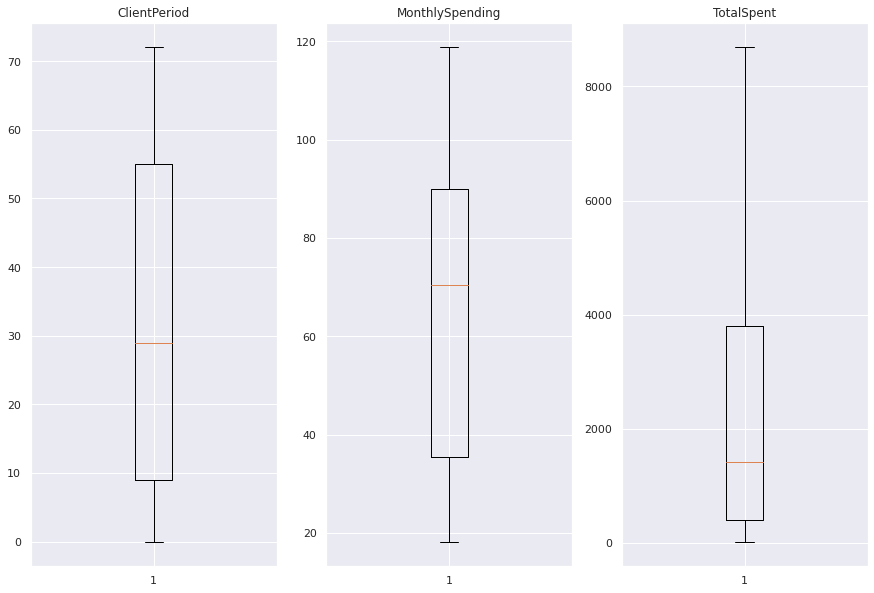

In [11]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(15, 10)

ax[0].boxplot(data.ClientPeriod)
ax[0].grid(color='w')
ax[0].set_title('ClientPeriod')

ax[1].boxplot([data.MonthlySpending])
ax[1].grid(color='w')
ax[1].set_title('MonthlySpending')

ax[2].boxplot(data.TotalSpent)
ax[2].grid(color='w')
ax[2].set_title('TotalSpent')

plt.show()

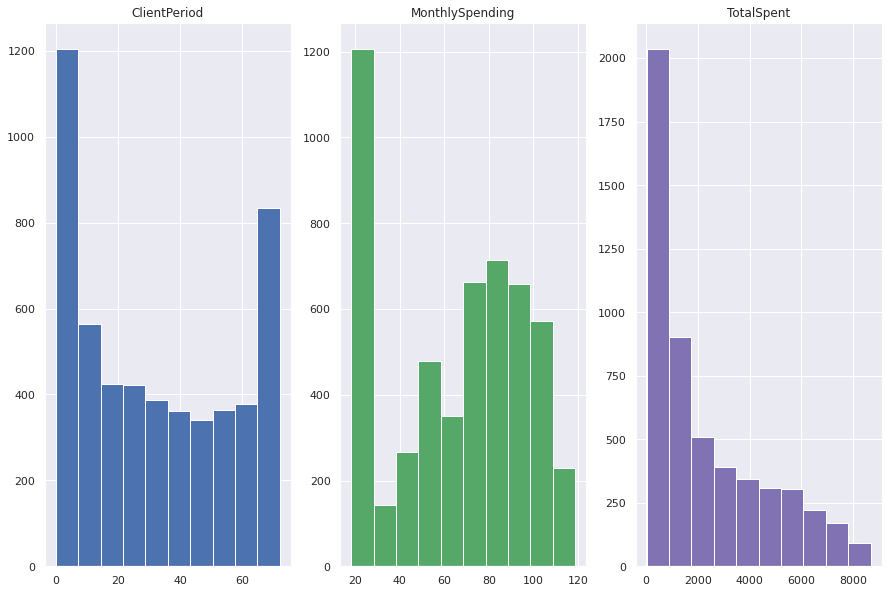

In [22]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(15, 10)

ax[0].hist(data.ClientPeriod, color='b')
ax[0].grid(color='w')
ax[0].set_title('ClientPeriod')

ax[1].hist([data.MonthlySpending], color='g')
ax[1].grid(color='w')
ax[1].set_title('MonthlySpending')

ax[2].hist(data.TotalSpent, color='m')
ax[2].grid(color='w')
ax[2].set_title('TotalSpent')

plt.show()

In [180]:
for i in cat_cols:
    print(data[i].value_counts(), end='\n\n')

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

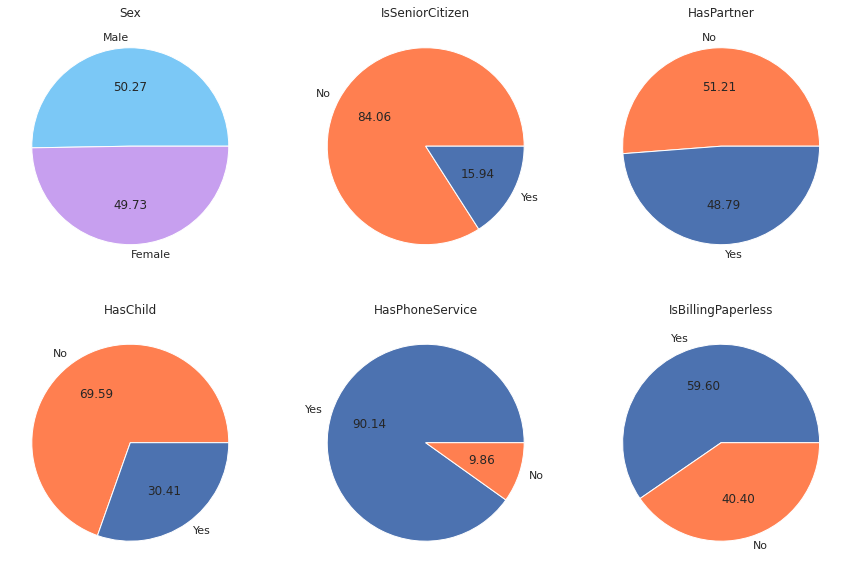

In [122]:
f, ax = plt.subplots(2, 3)
f.set_size_inches(15, 10)

ax[0, 0].pie(data.Sex.value_counts(), 
             labels=['Male', 'Female'], 
             autopct='%.2f', 
             colors=['#7BC8F6', '#C79FEF', 'k'])

ax[0, 0].set_title('Sex')

ax[0, 1].pie(data.IsSeniorCitizen.value_counts(), 
             labels=['No', 'Yes'], 
             autopct='%.2f', 
             colors=['coral', 'b'])

ax[0, 1].set_title('IsSeniorCitizen')

ax[0, 2].pie(data.HasPartner.value_counts(), 
             labels=['No', 'Yes'], 
             autopct='%.2f', 
             colors=['coral', 'b'])

ax[0, 2].set_title('HasPartner')

ax[1, 0].pie(data.HasChild.value_counts(), 
             labels=['No', 'Yes'], 
             autopct='%.2f', 
             colors=['coral', 'b'])

ax[1, 0].set_title('HasChild')

ax[1, 1].pie(data.HasPhoneService.value_counts(), 
             labels=['Yes', 'No'], 
             autopct='%.2f', 
             colors=['b', 'coral'])

ax[1, 1].set_title('HasPhoneService')

ax[1, 2].pie(data.IsBillingPaperless.value_counts(), 
             labels=['Yes', 'No'], 
             autopct='%.2f', 
             colors=['b', 'coral'])

ax[1, 2].set_title('IsBillingPaperless')

plt.show()

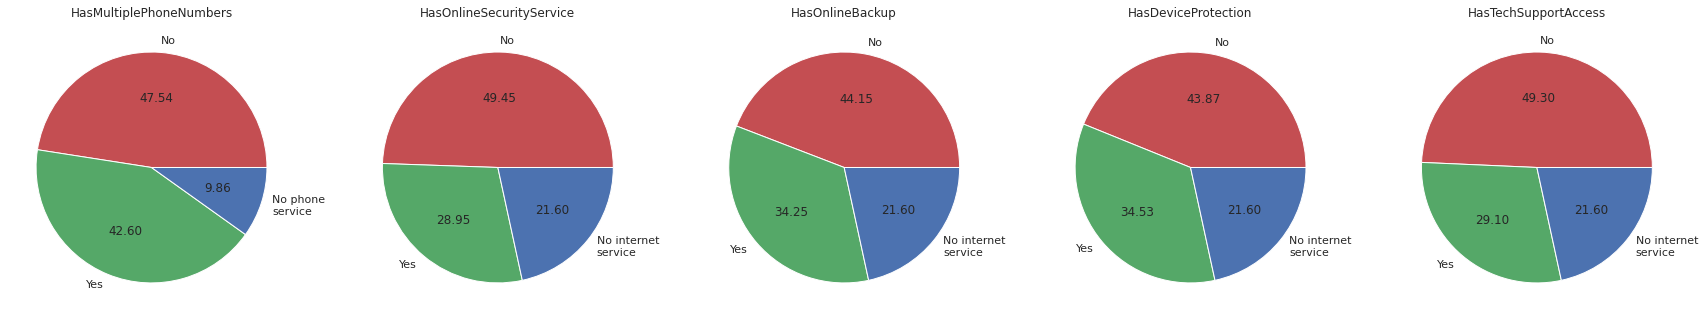

In [129]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(30, 10)

ax[0].pie(data.HasMultiplePhoneNumbers.value_counts(), 
          labels=['No', 'Yes', 'No phone \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[0].set_title('HasMultiplePhoneNumbers')

ax[1].pie(data.HasOnlineSecurityService.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[1].set_title('HasOnlineSecurityService')

ax[2].pie(data.HasOnlineBackup.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[2].set_title('HasOnlineBackup')

ax[3].pie(data.HasDeviceProtection.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[3].set_title('HasDeviceProtection')

ax[4].pie(data.HasTechSupportAccess.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[4].set_title('HasTechSupportAccess')

plt.show()

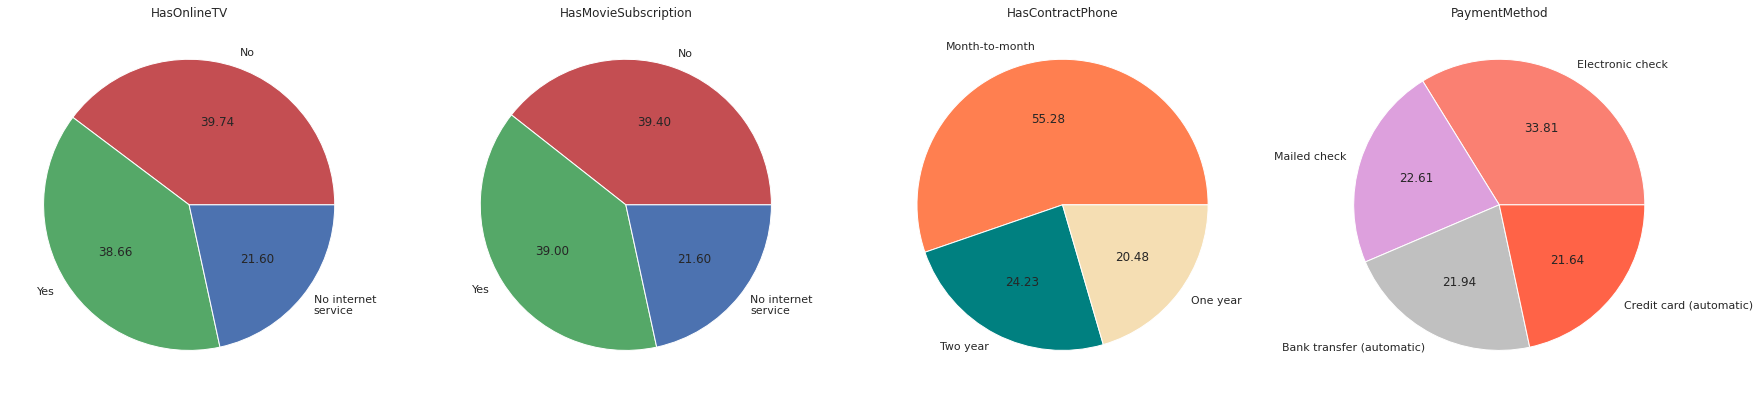

In [130]:
f, ax = plt.subplots(1, 4)
f.set_size_inches(30, 10)

ax[0].pie(data.HasOnlineTV.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[0].set_title('HasOnlineTV')

ax[1].pie(data.HasMovieSubscription.value_counts(), 
          labels=['No', 'Yes', 'No internet \nservice'], 
          autopct='%.2f', 
          colors=['r', 'g', 'b'])

ax[1].set_title('HasMovieSubscription')

ax[2].pie(data.HasContractPhone.value_counts(),
          labels=['Month-to-month', 'Two year', 'One year'], 
          autopct='%.2f', 
          colors=['coral', 'teal', 'wheat'])

ax[2].set_title('HasContractPhone')

ax[3].pie(data.PaymentMethod.value_counts(), 
          labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], 
          autopct='%.2f', 
          colors=['salmon', 'plum', 'silver', 'tomato'])

ax[3].set_title('PaymentMethod')

plt.show()

Распределение целевой переменной

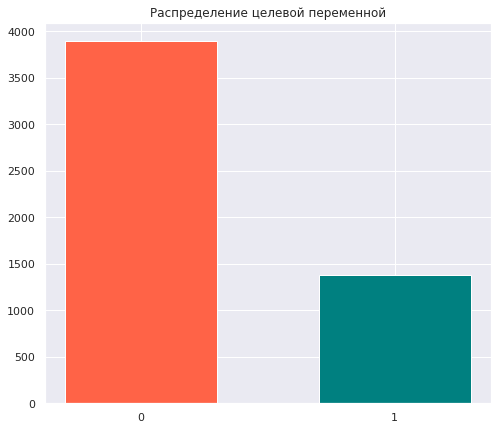

In [160]:
fig = plt.figure(figsize=(8, 7))
plt.title('Распределение целевой переменной')
plt.bar(x=[1, 2], height=data.Churn.value_counts(), 
        tick_label=[0, 1], 
        width=0.6, 
        color=['tomato', 'teal'])
plt.show()

Целевая переменная распределена не равномерно, примерно 2.8 к 1, но это не критично, классы не являются несбалансированными

## Применение линейных моделей 

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

Закодируем категориальные признаки:

In [228]:
data.Sex = data.Sex.map({'Male': 1, 'Female': 0}).astype(int)
data.HasPartner = data.HasPartner.map({'Yes': 1, 'No': 0}).astype(int)
data.HasChild = data.HasChild.map({'Yes': 1, 'No': 0}).astype(int)
data.HasPhoneService = data.HasPhoneService.map({'Yes': 1, 'No': 0}).astype(int)
data.IsBillingPaperless = data.IsBillingPaperless.map({'Yes': 1, 'No': 0}).astype(int)


data_test.Sex = data_test.Sex.map({'Male': 1, 'Female': 0}).astype(int)
data_test.HasPartner = data_test.HasPartner.map({'Yes': 1, 'No': 0}).astype(int)
data_test.HasChild = data_test.HasChild.map({'Yes': 1, 'No': 0}).astype(int)
data_test.HasPhoneService = data_test.HasPhoneService.map({'Yes': 1, 'No': 0}).astype(int)
data_test.IsBillingPaperless = data_test.IsBillingPaperless.map({'Yes': 1, 'No': 0}).astype(int)

In [229]:
dummies = pd.get_dummies(data[cols])

In [230]:
data = data.drop(cols, axis=1)

In [231]:
data = pd.concat([data, dummies], axis=1)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   Sex                                           5282 non-null   int64  
 4   IsSeniorCitizen                               5282 non-null   int64  
 5   HasPartner                                    5282 non-null   int64  
 6   HasChild                                      5282 non-null   int64  
 7   HasPhoneService                               5282 non-null   int64  
 8   IsBillingPaperless                            5282 non-null   int64  
 9   HasMultiplePhoneNumbers_No                    5282 non-null   u

In [233]:
dumm = pd.get_dummies(data_test[cols])
data_test = data_test.drop(cols, axis=1)
data_test = pd.concat([data_test, dumm], axis=1)

Нормируем признаки и строим модель логистической регрессии:

In [234]:
sc = StandardScaler()
x_scaled = sc.fit_transform(data)

In [235]:
x_test = sc.transform(data_test)

In [ ]:
gs = GridSearchCV(LogisticRegression(),
                  param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]}, 
                  scoring='roc_auc',
                  n_jobs=1, 
                  refit=True,
                  cv=5,
                  verbose=3)

In [ ]:
gs.fit(x_scaled, target)

Лучшее качество на Kaggle получилось 0.80832 для логистической регрессии с параметром модели С=10

Далее я попробовал случайный лес

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

gs = GridSearchCV(forest, param_grid=param_grid, cv=5)
gs.fit(x_train, y_train)

Лучшее качество на Kaggle получилось 0.84222

Без нормировки данных, со следующими параметрами модели:

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 400}

## Применение градиентного бустинга

In [ ]:
from catboost import CatBoostClassifier
from catboost import Pool

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=41)

In [ ]:
model = CatBoostClassifier(
    iterations=10000,
    learning_rate=0.001,
    #depth = 6,
    #bagging_temperature=1,
    #random_strength=1,
    #one_hot_max_size=2,
    #l2_leaf_reg=1,
    #leaf_estimation_method='Newton',
    #boosting_type='Ordered',
    custom_loss='AUC',
    early_stopping_rounds=20
)

In [ ]:
model.fit(
    x_train, y_train, 
    cat_features=cols, 
    eval_set=(x_test, y_test),
    verbose=False,
    plot=True    
)

Team name на Kaggle: **Денис_Деменков**

Лучший результат: **0.84741**

https://www.kaggle.com/competitions/advanced-dls-spring-2021/leaderboard